# Отчет

В отчете рассматриваются данные по объемам продаж нефтепродуктов на АЗС.   
Цель отчета: показать ход типовых действий при анализе данных.     

В этой работе выполняется:
- кластерный анализ;    
- корреляционный анализ;
- анализ, моделирование временного ряда и его прогноз на следующие 6 месяцев.


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

import calendar
from tabulate import tabulate

import statsmodels.api as sm

import warnings
from itertools import product
from scipy import stats


In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Предварительный анализ  

Загрузим датасет и изучим его:   
1) Первые 5 строк:

In [3]:
data = pd.read_excel(u"объём реализации.xlsx")

In [4]:
data.head()

,Объект Управления Показатели ИД ЕМИС,Организация Отделение,Регион Наименование,Объект Управления Показатели Адрес,Объект Управления Приемник Показатели Номер АЗС в сети,Канал Продаж Наименование,Номенклатурная Группа Наименование,Год,МесяцНомер,"Объем, тн."
0,2479,Организация Отделение 34,Регион Наименование 35,Объект Управления 36,24,Канал Продаж 4,Бензин 80,2014,1,4.143257
1,3000,Организация Отделение 20,Регион Наименование 45,Объект Управления 46,136,Канал Продаж 4,Бензин 80,2014,1,3.271002
2,3292,Организация Отделение 1,Регион Наименование 2,Объект Управления 50,37,Канал Продаж 4,Бензин 80,2014,1,54.162286
3,3260,Организация Отделение 1,Регион Наименование 2,Объект Управления 69,2,Канал Продаж 4,Бензин 80,2014,1,113.651676
4,3272,Организация Отделение 1,Регион Наименование 2,Объект Управления 74,14,Канал Продаж 4,Бензин 80,2014,1,84.890561


2) Размер датасета (строк, столбцов):

In [5]:
data.shape

(323186, 10)

3) Общая информация о данных в датасете:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323186 entries, 0 to 323185
Data columns (total 10 columns):
Объект Управления Показатели ИД ЕМИС                      323186 non-null object
Организация Отделение                                     323186 non-null object
Регион Наименование                                       323186 non-null object
Объект Управления Показатели Адрес                        323186 non-null object
Объект Управления Приемник Показатели Номер АЗС в сети    323186 non-null object
Канал Продаж Наименование                                 323186 non-null object
Номенклатурная Группа Наименование                        323186 non-null object
Год                                                       323186 non-null int64
МесяцНомер                                                323186 non-null int64
Объем, тн.                                                323186 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 24.7+ MB


4) Датасет содержит данные за период с января 2014 по сентябрь 2016

5) Посмотрим на содержимое каждой из колонок:

In [7]:
uniqueVar_1 = len(np.unique(data[u'Объект Управления Показатели ИД ЕМИС']))
uniqueVar_2 = len(np.unique(data[u'Организация Отделение']))
uniqueVar_3 = len(np.unique(data[u'Регион Наименование']))
uniqueVar_4 = len(np.unique(data[u'Объект Управления Показатели Адрес']))
uniqueVar_5 = len(np.unique(data[u'Объект Управления Приемник Показатели Номер АЗС в сети']))
uniqueVar_6 = len(np.unique(data[u'Канал Продаж Наименование']))
uniqueVar_7 = len(np.unique(data[u'Номенклатурная Группа Наименование']))
uniqueVar_8 = len(np.unique(data[u'Год']))
uniqueVar_9 = len(np.unique(data[u'МесяцНомер']))
uniqueVar_10 = len(np.unique(data[u'Объем, тн.']))

In [8]:
print u'Количество уникальных значений (шт.) в каждой из колонок таблицы'
table = [[u'Объект Управления Показатели ИД ЕМИС',uniqueVar_1],[u'Организация Отделение',uniqueVar_2], [u'Регион Наименование',uniqueVar_3],[u'Объект Управления Показатели Адрес',uniqueVar_4], [u'Объект Управления Приемник Показатели Номер АЗС в сети',uniqueVar_5], [u'Канал Продаж Наименование',uniqueVar_6],[u'Номенклатурная Группа Наименование',uniqueVar_7], [u'Год',uniqueVar_8],[u'МесяцНомер',uniqueVar_9], [u'Объем, тн.',uniqueVar_10]]
print tabulate(table)

Количество уникальных значений (шт.) в каждой из колонок таблицы
------------------------------------------------------  ------
Объект Управления Показатели ИД ЕМИС                      1273
Организация Отделение                                       36
Регион Наименование                                         35
Объект Управления Показатели Адрес                        1281
Объект Управления Приемник Показатели Номер АЗС в сети     441
Канал Продаж Наименование                                    2
Номенклатурная Группа Наименование                          12
Год                                                          3
МесяцНомер                                                  12
Объем, тн.                                              322314
------------------------------------------------------  ------


Если я все равильно понял, то датасет содержит информацию о 1273 АЗС, каждая из которых:
- относится к одному из 36 отделений; 
- находится в одном из 35 регионов;
- расположена по одному из 1281 адресов (вероятно, что некоторые АЗС имеют несколько адресов);
- имеет один из 441 номеров.    

На каждой АЗС имеется какой либо из 2 каналов продаж или оба сразу.   
АЗС осуществляют продажу некоторых или всех видов нефтепродуктов из 12 имеющихся.


6) Посмотрим какие регионы реализуют наибольший объем нефтепродуктов:

In [9]:
print '5 регионов, с наибольшим объемом проданых нефтепродуктов за период с января 2014г. по сентябрь 2016г.'
volumeByRegion = data.groupby(u'Регион Наименование')[u'Объем, тн.'].agg(np.sum)
volumeByRegion = pd.DataFrame(volumeByRegion)
volumeByRegion.sort_values(by = u'Объем, тн.', ascending=False).head()

5 регионов, с наибольшим объемом проданых нефтепродуктов за период с января 2014г. по сентябрь 2016г.


,"Объем, тн."
Регион Наименование,
Регион Наименование 35,2.667328e+06
Регион Наименование 15,1.971595e+06
Регион Наименование 31,1.916534e+06
Регион Наименование 45,1.838811e+06
Регион Наименование 57,1.513931e+06


7) Посмотрим какие АЗС реализуют наибольший объем нефтепродуктов:

In [10]:
print '5 АЗС, с наибольшим объемом проданых нефтепродуктов за период с января 2014г. по сентябрь 2016г.'
volumeByGazStation = data.groupby(u'Объект Управления Показатели ИД ЕМИС')[u'Объем, тн.'].agg(np.sum)
volumeByGazStation = pd.DataFrame(volumeByGazStation)
volumeByGazStation.sort_values(by = u'Объем, тн.', ascending=False)[1:6]

5 АЗС, с наибольшим объемом проданых нефтепродуктов за период с января 2014г. по сентябрь 2016г.


,"Объем, тн."
Объект Управления Показатели ИД ЕМИС,
6590,59963.883831
8161,58630.629052
5835,52181.624353
11128,51926.666443
5866,51765.888098


Примечание: в датасете присутствуют АЗС, у которых вместо ИД установлен - (прочерк). На таких АЗС за период было реализовано 62128.38 т. нефтепродуктов.

8)  Кластерный анализ данных

а) Общий анализ:   
Объемы продаж vs количество АЗС в 2014г, по месячно:

In [11]:
dataByVolumeMonth = pd.pivot_table(data[data[u'Год'] == 2014], values=u'Объем, тн.', index=[u'Объект Управления Показатели ИД ЕМИС'],
                     columns=[u'МесяцНомер'], fill_value = 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000161D0048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017795550>]], dtype=object)

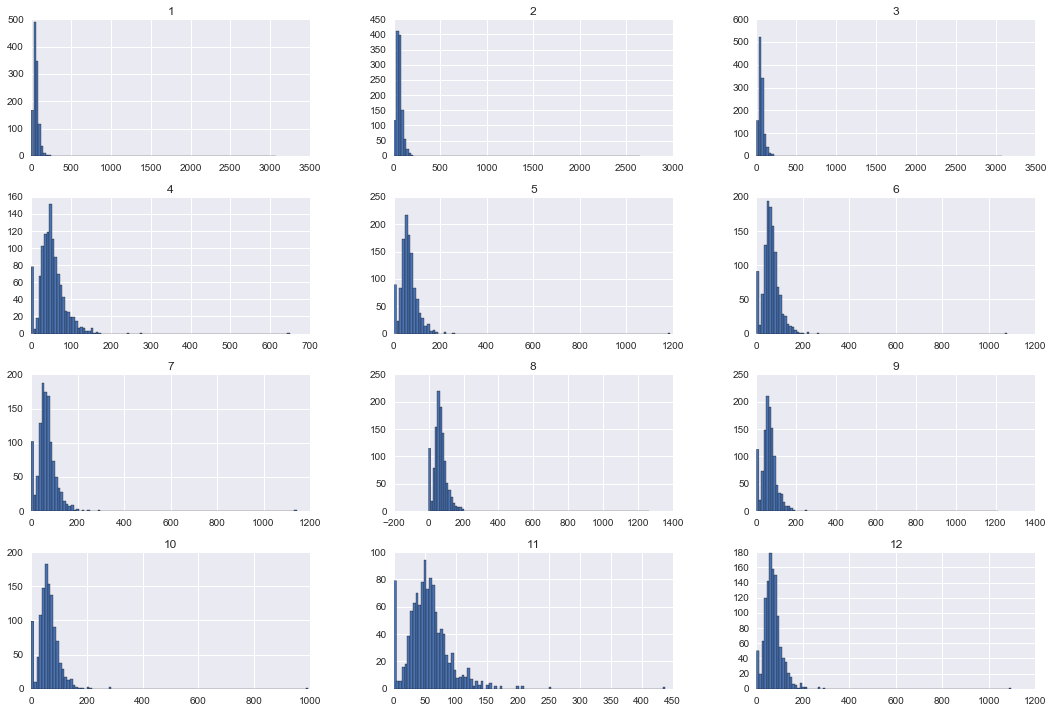

In [54]:
plt.figure(figsize(18,12))
dataByVolumeMonth.hist(bins = 100)

Как видно из графиков, объемы продаж на АЗС в основном сконцетрированы в диапазоне от 0 до 300 т. в месяц.

Форма таблицы:

In [13]:
dataByVolumeMonth.head()

МесяцНомер,1,2,3,4,5,6,7,8,9,10,11,12
Объект Управления Показатели ИД ЕМИС,,,,,,,,,,,,
1091,81.879591,76.862961,84.007285,72.025513,87.399179,85.450640,88.816981,89.299417,86.602702,93.567571,61.964748,94.198838
1092,61.430193,59.237869,61.355338,47.582997,60.652038,59.360152,64.555152,61.843199,58.569153,73.467036,56.578846,80.431047
1093,73.552452,71.558791,71.034282,57.041748,72.502131,70.589608,76.724178,74.016482,76.331480,59.645386,47.666847,79.121702
1094,74.559984,69.812170,75.307225,64.154613,84.073919,84.068031,90.956369,89.235893,81.709437,33.376589,61.985059,88.711158
1095,36.887967,32.084534,33.484041,27.250423,36.542819,37.664651,39.119292,40.187540,37.507118,38.966619,29.527816,44.583356


Количество АЗС:

In [14]:
len(dataByVolumeMonth)

1174

б) Кластерный анализ    
- Объемы продаж на АЗС в 2014, по месячно.     
АЗС четко сгруппированы по кластерам. При необходимости можно более подробно изучить АЗС в кластерах и сделать необходимые выводы.

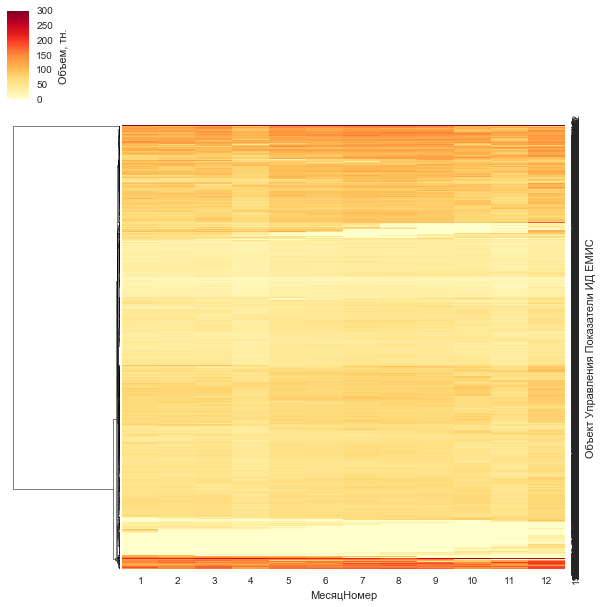

In [15]:
g = sns.clustermap(dataByVolumeMonth, vmin = 0, vmax= 300, cmap="YlOrRd", cbar_kws={'label':u'Объем, тн.'}, row_cluster=True,
 col_cluster=False)

- Объемы продаж на АЗС в регионах:     
При необходимости можно более подробно изучить АЗС в кластерах и сделать необходимые выводы.

In [16]:
dataByVolumeRegion = pd.pivot_table(data, values=u'Объем, тн.', index=[u'Объект Управления Показатели ИД ЕМИС'],
                     columns=[u'Регион Наименование'], fill_value = 0)

In [17]:
dataByVolumeRegion.head()

Регион Наименование,Регион Наименование 11,Регион Наименование 111,Регион Наименование 115,Регион Наименование 121,Регион Наименование 15,Регион Наименование 18,Регион Наименование 2,Регион Наименование 21,Регион Наименование 229,Регион Наименование 231,...,Регион Наименование 638,Регион Наименование 66,Регион Наименование 693,Регион Наименование 7,Регион Наименование 766,Регион Наименование 79,Регион Наименование 84,Регион Наименование 905,Регион Наименование 95,Регион Наименование 99
Объект Управления Показатели ИД ЕМИС,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.054507,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.235437,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.717012,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.999641,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.169225,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dataByVolumeRegion.tail()

Регион Наименование,Регион Наименование 11,Регион Наименование 111,Регион Наименование 115,Регион Наименование 121,Регион Наименование 15,Регион Наименование 18,Регион Наименование 2,Регион Наименование 21,Регион Наименование 229,Регион Наименование 231,...,Регион Наименование 638,Регион Наименование 66,Регион Наименование 693,Регион Наименование 7,Регион Наименование 766,Регион Наименование 79,Регион Наименование 84,Регион Наименование 905,Регион Наименование 95,Регион Наименование 99
Объект Управления Показатели ИД ЕМИС,,,,,,,,,,,,,,,,,,,,,
200000006,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
200000010,0.000000,0.0,0.0,0.0,40.774652,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
200000011,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
200000085,1.195218,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
-,3.000695,0.0,0.0,0.0,0.000000,0.0,95.771011,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.428082,0.0,0.0,0.0,0.0


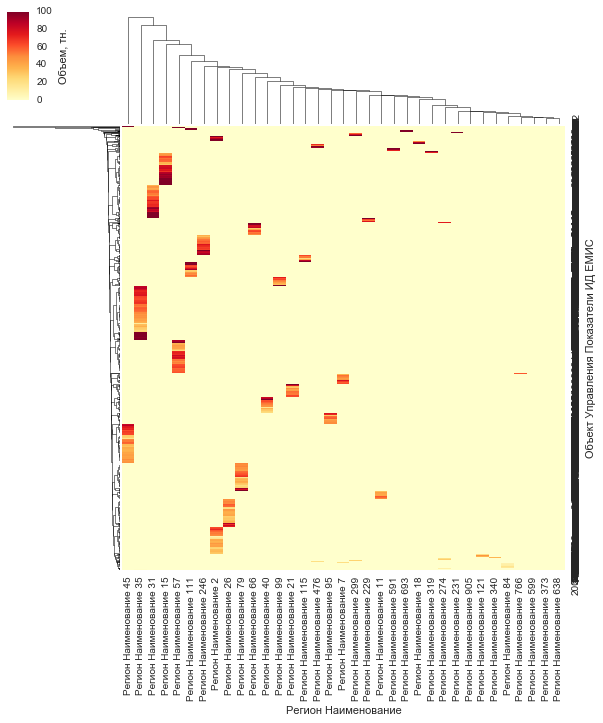

In [19]:
g = sns.clustermap(dataByVolumeRegion, vmin = 0, vmax= 100, cmap="YlOrRd", cbar_kws={'label':u'Объем, тн.'}, row_cluster=True,
 col_cluster=True)

- Объемы продаж на АЗС различных видов топлива:     
При необходимости можно более подробно изучить АЗС в кластерах и сделать необходимые выводы.

In [20]:
dataByVolumeFuel = pd.pivot_table(data, values=u'Объем, тн.', index=[u'Объект Управления Показатели ИД ЕМИС'],
                     columns=[u'Номенклатурная Группа Наименование'], fill_value = 0)

In [21]:
dataByVolumeFuel.head()

Номенклатурная Группа Наименование,Бензин 80,Бензин 92,Бензин 95,Бензин 95 бренд,Бензин 98,Бензин 98 бренд,Топливо дизельное зимнее,Топливо дизельное зимнее бренд,Топливо дизельное летнее,Топливо дизельное летнее бренд,Топливо дизельное с присадками зимнее,Топливо дизельное с присадками летнее
Объект Управления Показатели ИД ЕМИС,,,,,,,,,,,,
1091,0.0,194.628841,147.179766,26.961092,0.0,15.428191,29.799393,18.288202,41.899645,18.133764,0.000000,22.240347
1092,0.0,131.122027,54.914572,9.098251,0.0,0.000000,44.163312,0.000000,42.943459,0.000000,44.537160,48.448679
1093,0.0,126.644300,57.788110,13.255142,0.0,0.000000,51.247530,0.000000,59.174012,0.000000,34.411117,44.817813
1094,0.0,138.133951,72.907269,18.164487,0.0,0.000000,56.948118,0.000000,63.086838,0.000000,55.374113,52.910728
1095,0.0,90.501211,26.793714,8.986721,0.0,0.000000,15.907106,0.000000,18.206012,0.000000,19.485000,20.974129


In [22]:
dataByVolumeFuel.tail()

Номенклатурная Группа Наименование,Бензин 80,Бензин 92,Бензин 95,Бензин 95 бренд,Бензин 98,Бензин 98 бренд,Топливо дизельное зимнее,Топливо дизельное зимнее бренд,Топливо дизельное летнее,Топливо дизельное летнее бренд,Топливо дизельное с присадками зимнее,Топливо дизельное с присадками летнее
Объект Управления Показатели ИД ЕМИС,,,,,,,,,,,,
200000006,0.000000,44.276114,12.961006,17.606637,0.000000,0.000000,0.000000,0.0,6.687678,0.0,0.000000,0.000000
200000010,0.000000,52.214129,53.350243,15.169408,0.000000,0.000000,0.000000,0.0,42.364827,0.0,0.000000,0.000000
200000011,0.000000,60.803308,86.336251,0.000000,0.000000,0.000000,0.000000,0.0,20.843840,0.0,0.000000,0.000000
200000085,0.000000,1.865004,0.596583,0.705000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.369176
-,16.328702,54.718299,32.161661,10.403106,1.244072,0.078955,163.632798,0.0,186.717668,0.0,54.470159,57.025164


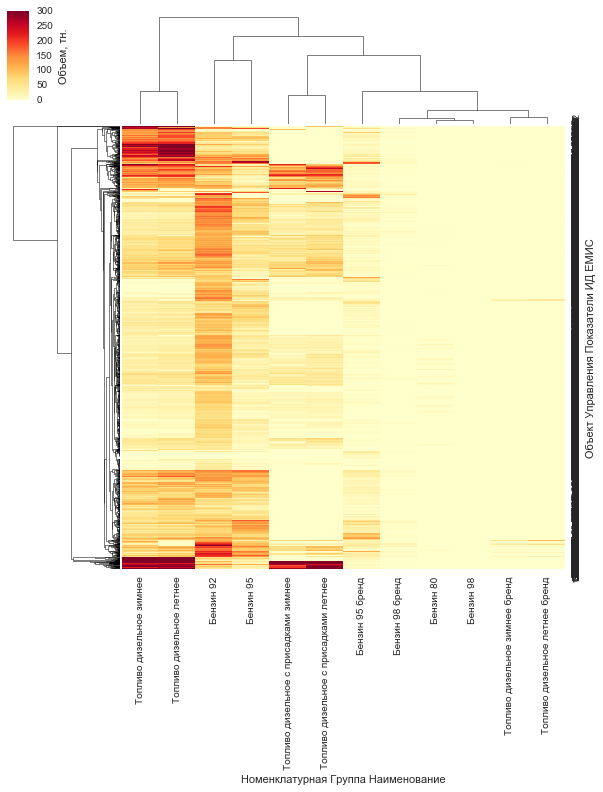

In [23]:
g = sns.clustermap(dataByVolumeFuel, vmin = 0, vmax= 300, cmap="YlOrRd", cbar_kws={'label':u'Объем, тн.'}, row_cluster=True,
 col_cluster=True)

8) Определим корреляцию продаж на АЗС в зависимости от региона:

Корреляции Пирсона и Спирмена не рассчитаны на применение к бинарным или категориальным признакам. Полученная величина будет иметь мало смысла. Для пар признаков, один из которых непрерывный, а другой — категориальный, вообще не нужно считать никакой коэффициент корреляции. X1 (вещественный) и X2 (бинарный) будут положительно коррелированы, если:   
$$E(X_1|X_2 = 1) > E(X_1|X_2 = 0)$$   
Таким образом, мерой силы взаимосвязи между X1 и X2 может служить просто разность этих математических ожиданий: 
$$E(X_1|X_2 = 1) - E(X_1|X_2 = 0)$$   
Эта величина не нормированная, она может меняться в любом диапазоне, от минус бесконечности до плюс бесконечности. Однако её гораздо легче интерпретировать, чем коэффициент корреляции, который можно вычислить на такой паре выборок.   
В нашем случае мера силы взаимосвязи между объемом продаж и регионом будет интерпретироваться следующим образом: насколько выше средний объем продаж в регионе, чем средний объем продаж по всем остальным регионам.  


Преобразуем признак Регион Наименование в бинарный. Ниже, в качестве примера, показана выборка для случая Регион Наименование = Регион Наименование 84:

In [24]:
def code_one(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + i] = (data[feature] == i).astype(float)

In [25]:
code_one(data, u'Регион Наименование')

In [26]:
data[data[u'Регион Наименование'] == u'Регион Наименование 84'].head()

,Объект Управления Показатели ИД ЕМИС,Организация Отделение,Регион Наименование,Объект Управления Показатели Адрес,Объект Управления Приемник Показатели Номер АЗС в сети,Канал Продаж Наименование,Номенклатурная Группа Наименование,Год,МесяцНомер,"Объем, тн.",...,Регион Наименование=Регион Наименование 591,Регион Наименование=Регион Наименование 693,Регион Наименование=Регион Наименование 340,Регион Наименование=Регион Наименование 766,Регион Наименование=Регион Наименование 905,Регион Наименование=Регион Наименование 638,Регион Наименование=Регион Наименование 373,Регион Наименование=Регион Наименование 274,Регион Наименование=Регион Наименование 599,Регион Наименование=Регион Наименование 84
269936,21125,Организация Отделение 83,Регион Наименование 84,Объект Управления 85,509,Канал Продаж 4,Бензин 95 бренд,2016,8,0.091528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270078,21124,Организация Отделение 83,Регион Наименование 84,Объект Управления 294,508,Канал Продаж 4,Бензин 95 бренд,2016,8,0.199608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270206,21126,Организация Отделение 83,Регион Наименование 84,Объект Управления 470,510,Канал Продаж 4,Бензин 95 бренд,2016,8,0.425330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270225,21127,Организация Отделение 83,Регион Наименование 84,Объект Управления 495,511,Канал Продаж 4,Бензин 95 бренд,2016,8,0.252390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270264,21119,Организация Отделение 83,Регион Наименование 84,Объект Управления 542,503,Канал Продаж 4,Бензин 95 бренд,2016,8,0.018330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Составим таблицу меры силы взаимосвязи между объемом продаж и регионами:

In [27]:
volumeRegionCorr = np.zeros(35)
k = 0
for i in data.columns[-35:]:
    a = sum(data[data[i] == 1][u'Объем, тн.'].values) / len(data[data[i] == 1])
    b = sum(data[data[i] == 0][u'Объем, тн.'].values) / len(data[data[i] == 0])
    volumeRegionCorr[k] = a - b
    k = k + 1  

volumeRegionCorr = pd.DataFrame(volumeRegionCorr, index=data.columns[-35:], columns = [u'Насколько выше средний объем продаж в регионе, чем средний объем продаж по всем остальным регионам'])
volumeRegionCorr    

,"Насколько выше средний объем продаж в регионе, чем средний объем продаж по всем остальным регионам"
Регион Наименование=Регион Наименование 35,2.158147
Регион Наименование=Регион Наименование 45,-12.302633
Регион Наименование=Регион Наименование 2,-13.133484
Регион Наименование=Регион Наименование 79,-13.843985
Регион Наименование=Регион Наименование 26,-14.902855
Регион Наименование=Регион Наименование 11,-11.375249
Регион Наименование=Регион Наименование 7,-9.611254
Регион Наименование=Регион Наименование 15,18.827935
Регион Наименование=Регион Наименование 18,26.664836
Регион Наименование=Регион Наименование 21,-8.937322


8) Посмотрим на долю каждого нефтепродукта в общем объеме:

In [28]:
data['lastDayInMonth'] = [calendar.monthrange(data[u'Год'].iloc[x], data[u'МесяцНомер'].iloc[x])[1] for x in range(len(data))]
data['dateTime'] = pd.to_datetime(pd.DataFrame({'year': data[u'Год'], 'month': data[u'МесяцНомер'], 'day': data['lastDayInMonth']}))

In [29]:
Petrol80 = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 80']
Petrol92 = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 92']
Petrol95 = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 95']
Petrol95Brend = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 95 бренд']
Petrol98 = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 98']
Petrol98Brend = data[data[u'Номенклатурная Группа Наименование'] == u'Бензин 98 бренд']
DieselWinter = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное зимнее']
DieselWinterBrend = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное зимнее бренд']
DieselSummer = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное летнее']
DieselSummerBrend = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное летнее бренд']
DieselWithAddsWinter = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное с присадками зимнее']
DieselWithAddsSummer = data[data[u'Номенклатурная Группа Наименование'] == u'Топливо дизельное с присадками летнее']

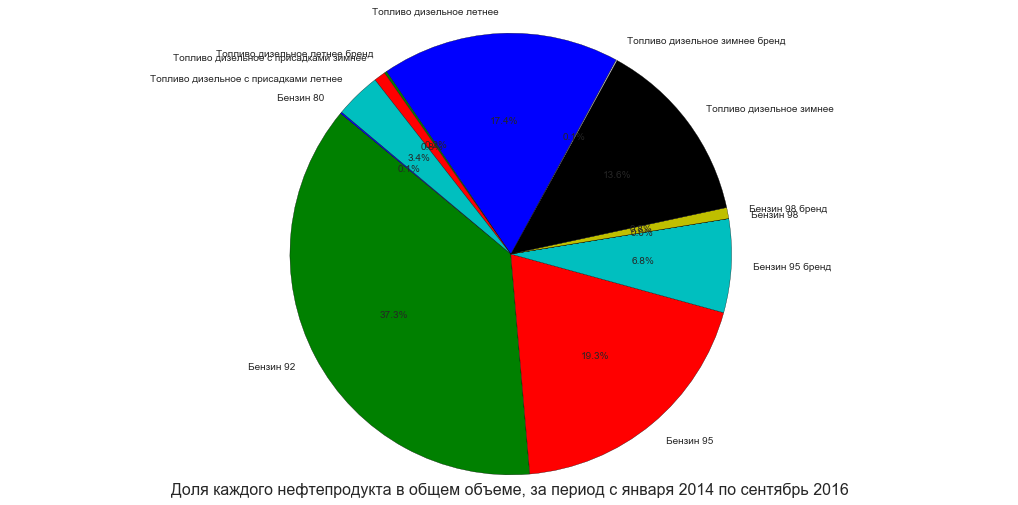

In [30]:
# Data to plots
labels = np.unique(data[u'Номенклатурная Группа Наименование'])
sizes = [sum(Petrol80[u'Объем, тн.']), sum(Petrol92[u'Объем, тн.']), sum(Petrol95[u'Объем, тн.']), sum(Petrol95Brend[u'Объем, тн.']), sum(Petrol98[u'Объем, тн.']), sum(Petrol98Brend[u'Объем, тн.']),  sum(DieselWinter[u'Объем, тн.']),  sum(DieselWinterBrend[u'Объем, тн.']), sum(DieselSummer[u'Объем, тн.']),sum(DieselSummerBrend[u'Объем, тн.']),  sum(DieselWithAddsWinter[u'Объем, тн.']), sum(DieselWithAddsSummer[u'Объем, тн.']) ]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)

plt.figure(figsize(18,8))
plt.pie(sizes,  labels=labels,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.xlabel(u'Доля каждого нефтепродукта в общем объеме, за период с января 2014 по сентябрь 2016', size = 16)

In [31]:
print u'Объем нефтепродуктов (т.), реализованный за период с января 2014 г. по сентябрь 2016 г.'
table1 = [[u'Бензин 92',sum(Petrol92[u'Объем, тн.'])], [u'Бензин 95',sum(Petrol95[u'Объем, тн.'])], [u'Топливо дизельное летнее',sum(DieselSummer[u'Объем, тн.'])], [u'Топливо дизельное зимнее',sum(DieselWinter[u'Объем, тн.'])], [u'Бензин 95 бренд',sum(Petrol95Brend[u'Объем, тн.'])], [u'Топливо дизельное с присадками летнее, тн.',sum(DieselWithAddsSummer[u'Объем, тн.'])], [u'Топливо дизельное с присадками зимнее, тн.',sum(DieselWithAddsWinter[u'Объем, тн.'])], [u'Бензин 98 бренд',sum(Petrol98Brend[u'Объем, тн.'])], [u'Топливо дизельное летнее бренд',sum(DieselSummerBrend[u'Объем, тн.'])], [u'Бензин 80', sum(Petrol80[u'Объем, тн.'])], [u'Топливо дизельное зимнее бренд',sum(DieselWinterBrend[u'Объем, тн.'])], [u'Бензин 98',sum(Petrol98[u'Объем, тн.'])]]
print tabulate(table1)

Объем нефтепродуктов (т.), реализованный за период с января 2014 г. по сентябрь 2016 г.
------------------------------------------  ----------------
Бензин 92                                        7.66601e+06
Бензин 95                                        3.97116e+06
Топливо дизельное летнее                         3.57766e+06
Топливо дизельное зимнее                         2.79849e+06
Бензин 95 бренд                                  1.40585e+06
Топливо дизельное с присадками летнее, тн.  687668
Топливо дизельное с присадками зимнее, тн.  174159
Бензин 98 бренд                             166337
Топливо дизельное летнее бренд               34680.7
Бензин 80                                    28497.2
Топливо дизельное зимнее бренд               16252.7
Бензин 98                                       45.3333
------------------------------------------  ----------------


Из диаграммы и таблицы видно, что на Бензин 92, Бензин 95, Топливо дизельное летнее, Топливо дизельное зимнее и Бензин 95 бренд приходится ~93% от всего объема продаваемых нефтепродуктов.

9) Посмотрим на динамику продаж каждого из нефтепродуктов:

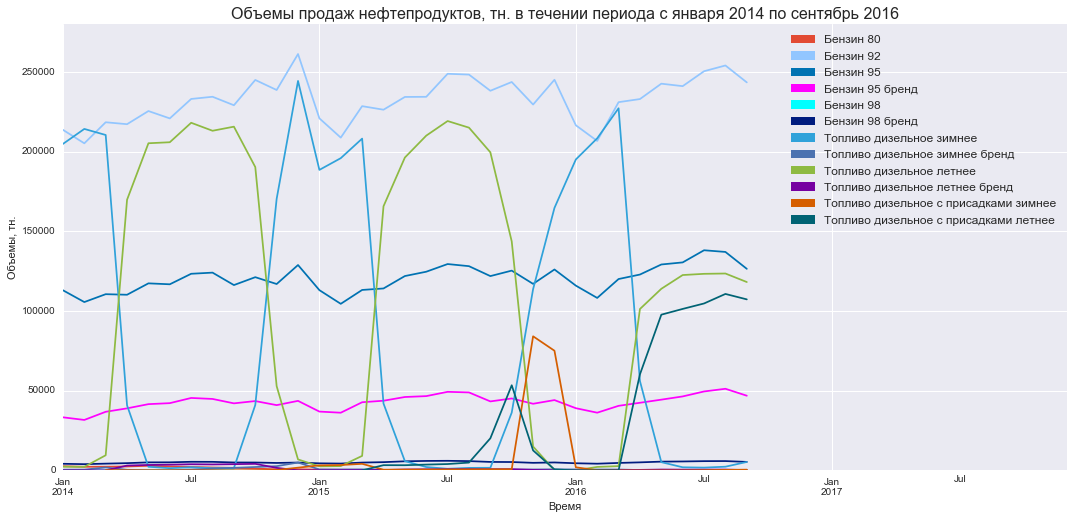

In [32]:
bar1 = plt.Rectangle((0,0),1,1, fc='#E24A33',  edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1, fc='#92C6FF',  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1, fc='#0072B2',  edgecolor = 'none')
bar4 = plt.Rectangle((0,0),1,1, fc='magenta',  edgecolor = 'none')
bar5 = plt.Rectangle((0,0),1,1, fc='cyan',  edgecolor = 'none')
bar6 = plt.Rectangle((0,0),1,1, fc='#001C7F',  edgecolor = 'none')
bar7 = plt.Rectangle((0,0),1,1, fc='#30a2da',  edgecolor = 'none')
bar8 = plt.Rectangle((0,0),1,1, fc='#4C72B0',  edgecolor = 'none')
bar9 = plt.Rectangle((0,0),1,1, fc='#8EBA42',  edgecolor = 'none')
bar10 = plt.Rectangle((0,0),1,1, fc='#7600A1',  edgecolor = 'none')
bar11 = plt.Rectangle((0,0),1,1, fc='#D55E00',  edgecolor = 'none')
bar12 = plt.Rectangle((0,0),1,1, fc='#006374',  edgecolor = 'none')


Petrol80.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#E24A33')
Petrol92.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#92C6FF')
Petrol95.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#0072B2')
Petrol95Brend.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='magenta')
Petrol98.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='cyan')
Petrol98Brend.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#001C7F')
DieselWinter.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#30a2da')
DieselWinterBrend.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#4C72B0')
DieselSummer.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#8EBA42')
DieselSummerBrend.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#7600A1')
DieselWithAddsWinter.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#D55E00')
DieselWithAddsSummer.groupby('dateTime')[u'Объем, тн.'].agg(np.sum).plot(color='#006374')
plt.xlim('2014-01-31 00:00:00', '2017-12-30 00:00:00')
plt.ylim(0, 280000)
plt.legend([bar1, bar2, bar3, bar4, bar5, bar6, bar7, bar8, bar9, bar10, bar11, bar12], np.unique(data[u'Номенклатурная Группа Наименование']), loc=1, ncol = 1, prop={'size':12})
plt.title(u'Объемы продаж нефтепродуктов, тн. в течении периода с января 2014 по сентябрь 2016', size = 16)
plt.ylabel(u'Объемы, тн.')
plt.xlabel(u'Время')


У дизельных видов топлива, ввиду наличия зимнего и летнего вариантов, четко прослеживается сезонность.   
У бензинов прослеживается повышающийся тренд.   
У всех видов нефтепродуктов ежегодно прослеживается пик потребления в декабре с последующим спадом в январе (конец рабочего года, Новый год и январские каникулы).

## Прогнозирование продаж 

В этом разделе я проведу моделирование продаж Бензина 92 и их прогнозирование на ближайшие 1-3-6 месяцев.   
Примечание: я рассматриваю конкретный нефтепродукт, т.к. посчитал, что в реальной жизни навряд ли прогнозируют общий объем всех нефтепродуктов (т.к. хранятся в разных тарах). Если я не прав, то технология (последовательность операций) для моделирования и прогнозирования общего объема нефтепродуктов будет аналогичной той, что проведу для Бензина 92.

1) Рассмотрим временой ряд. Разложим его на составляющие: тренд, сезонность и шум.

In [33]:
Petrol92TimeSeries = Petrol92.groupby('dateTime')[u'Объем, тн.'].agg(np.sum)
Petrol92TimeSeriesDataFrame = pd.DataFrame(Petrol92TimeSeries, index = Petrol92TimeSeries.index)
Petrol92TimeSeriesDataFrame.columns = ['Volume']

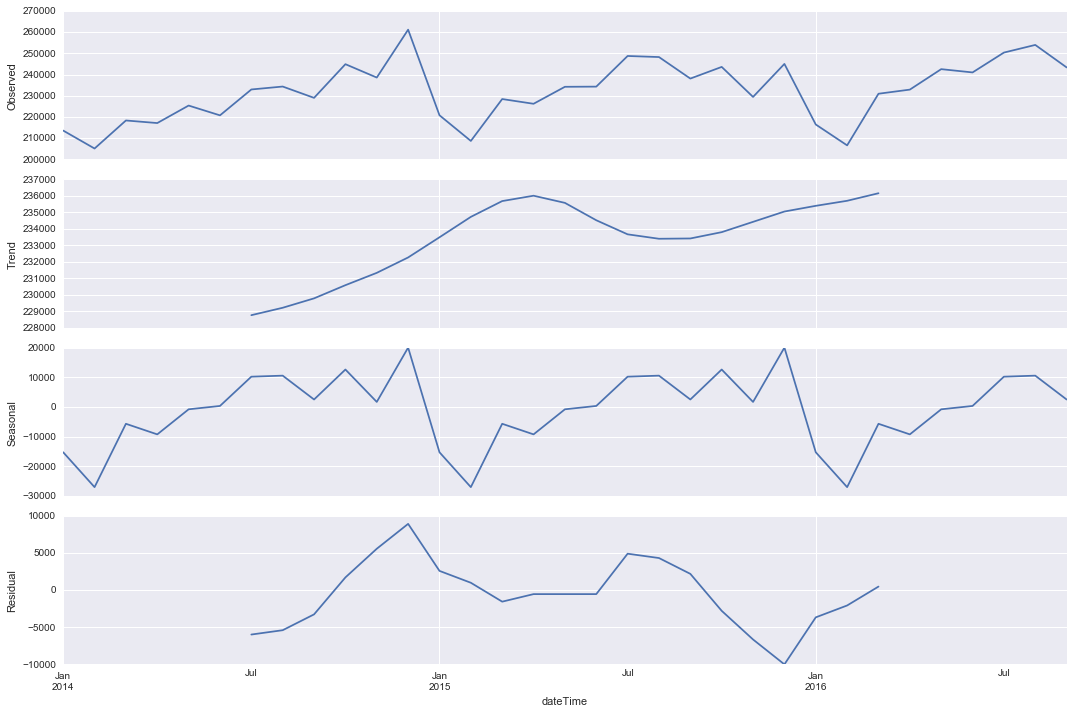

In [34]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(Petrol92TimeSeriesDataFrame.Volume).plot()
plt.show()

Выводы:   
- наблюдается восходящий тренд;
- наблюдается сезонность;
- наблюдается несистематическая ошибка (шум). Наверняка она связанна с политической ситуацией в стране (декабрь 2014 и июль 2015);
- дисперсия в начале и в конце временного ряда одинакова. Поэтому преобразования Бокса-Кокса проводить не будем.

Для построения модели необходимо исключить влияние тренда и сезонности, а также должна быть обеспечена стационарность. Для проверки на стационарность используется критерий Дики Фуллера (должен быть <0,05).  Рассчитаем этот критерий:


In [35]:
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(Petrol92TimeSeriesDataFrame['Volume'])[1]

Критерий Дики-Фуллера: p=0.047165


### Модель ARIMA 

Несмотря на то, что критерий Дики-Фуллера удолетворительный, проведем сезонное и попарное дифференцирования - для того, чтобы исключить влияние тренда и сезоннсти.

In [36]:
Petrol92TimeSeriesDataFrame['Volume_diff12'] = Petrol92TimeSeriesDataFrame['Volume'] - Petrol92TimeSeriesDataFrame['Volume'].shift(12)
Petrol92TimeSeriesDataFrame['Volume_diff12and2'] = Petrol92TimeSeriesDataFrame['Volume_diff12'] - Petrol92TimeSeriesDataFrame['Volume_diff12'].shift(1)

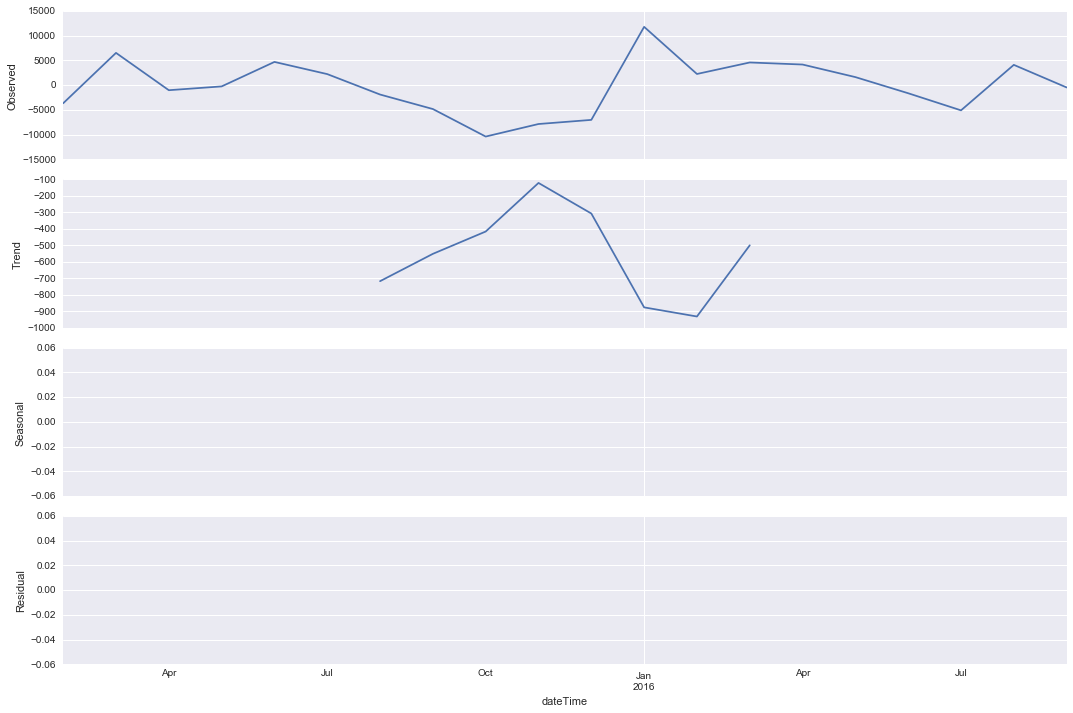

In [37]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(Petrol92TimeSeriesDataFrame['Volume_diff12and2'][13:]).plot() 
plt.show()

Как видно из графиков выше влияние сезонности и нума полностью исключено. Влияние тренда стало значительно меньше. 

Для подбора параметров модели ARIMA проанализируем автокорреяционную и частичную автокорреляционную функции: 

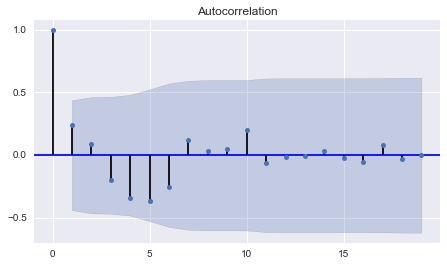

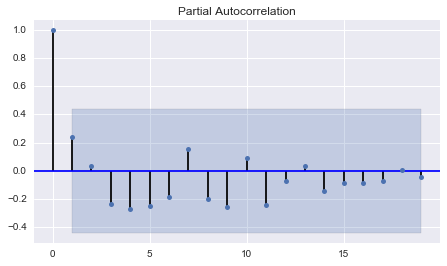

In [38]:
plt.figure(figsize(16,4))
ax = plt.subplot(1,2,1)
sm.graphics.tsa.plot_acf(Petrol92TimeSeriesDataFrame['Volume_diff12and2'][13:].values.squeeze(), ax=ax)
pylab.show()
ax = plt.subplot(1,2,2)
sm.graphics.tsa.plot_pacf(Petrol92TimeSeriesDataFrame['Volume_diff12and2'][13:].values.squeeze(), ax=ax)
pylab.show()

Итого: p = 1, P = 0, q = 1, Q = 0. Произведем перебор параметров для выбора оптимального значения модели по информационному критерию Акаике (самый минимальный):

In [42]:
ps = range(0, 2)
d=1
qs = range(0, 2)
Ps = range(0, 2)
D=1
Qs = range(0, 1)

In [43]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print "Всего комбинаций параметров:", len(parameters_list)

Всего комбинаций параметров: 8


In [44]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(Petrol92TimeSeriesDataFrame['Volume'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print 'wrong parameters:', param
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

wrong parameters: (0, 0, 0, 0)
Wall time: 695 ms


In [45]:
%%time
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print 'best parameters:'
print result_table.sort_values(by = 'aic', ascending=True).head(10)

best parameters:
     parameters         aic
4  (1, 0, 1, 0)  399.375536
2  (0, 1, 1, 0)  399.561274
6  (1, 1, 1, 0)  400.475867
0  (0, 0, 1, 0)  401.761567
1  (0, 1, 0, 0)  403.050213
3  (1, 0, 0, 0)  403.069523
5  (1, 1, 0, 0)  404.225638
Wall time: 5 ms


Описание полученной лучшей модели:

In [46]:
print best_model.summary()

                                 Statespace Model Results                                 
Dep. Variable:                             Volume   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -196.688
Date:                            Mon, 24 Oct 2016   AIC                            399.376
Time:                                    14:33:02   BIC                            403.865
Sample:                                01-31-2014   HQIC                           400.886
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0209      0.138      0.152      0.880      -0.249       0.291
ar.S.L12      -0.0514      0.113   

Посмотрим на остатки (residuals):

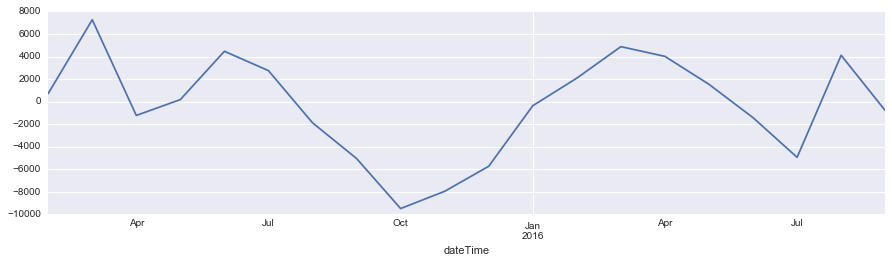

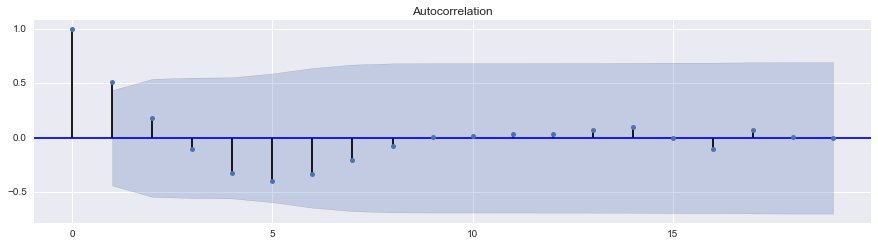

Критерий Стьюдента: p=0.741012
Критерий Дики-Фуллера: p=0.958532


In [47]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
#plt.ylabel(u'Остатки')
pylab.show()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(),  ax=ax)
pylab.show()

print "Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1]
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1]

Остатки несмещены (подтверждается критерием Стьюдента), но нестационарны (вероятно мало данных), неавтокоррелированы (подтверждается критерием Льюнга-Бокса и коррелограммой).    

Посмотрим, насколько хорошо модель описывает данные:

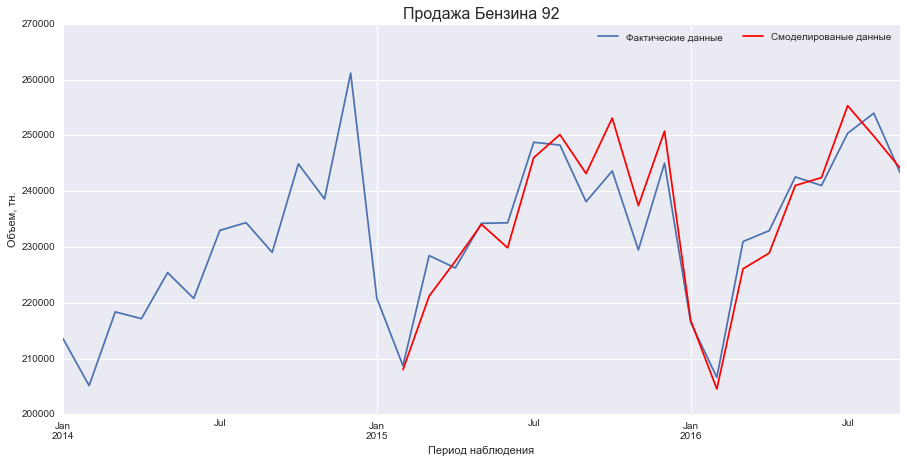

In [48]:
warnings.filterwarnings('ignore')
Petrol92TimeSeriesDataFrame['model'] = best_model.fittedvalues
plt.figure(figsize(15,7))
plot1 = Petrol92TimeSeriesDataFrame['Volume'].plot()
plot2 = Petrol92TimeSeriesDataFrame.model[13:].plot(color='r')
plt.ylabel(u'Объем, тн.')
plt.xlabel(u'Период наблюдения')
plt.legend( [u'Фактические данные', u'Смоделированые данные'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Продажа Бензина 92', size = 16)
pylab.show()
warnings.filterwarnings('default')

Смоделируем прогноз на 1-3-6 месяцев:

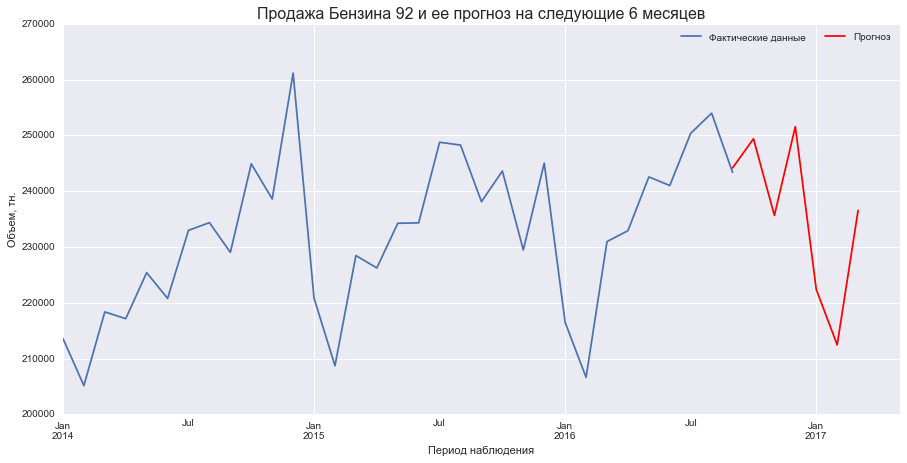

In [49]:
data2 = Petrol92TimeSeriesDataFrame[['Volume']]
date_list = [datetime.datetime(2016, 10, 31, 0, 0), datetime.datetime(2016, 11, 30, 0, 0), datetime.datetime(2016, 12, 31, 0, 0), datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 2, 28, 0, 0), datetime.datetime(2017, 3, 31, 0, 0)]
future = pd.DataFrame(index=date_list, columns= data2.columns)
data2 = pd.concat([data2, future])
data2['forecast'] = best_model.predict(start=32, end=40)

plt.figure(figsize(15,7))
data2.Volume.plot()
data2.forecast.plot(color='r')
plt.ylabel(u'Объем, тн.')
plt.legend( [u'Фактические данные', u'Прогноз'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Продажа Бензина 92 и ее прогноз на следующие 6 месяцев', size = 16)
plt.xlabel(u'Период наблюдения')
plt.xlim('2014-01-01', '2017-05-01')
pylab.show()

Численные значения для прогноза:

In [50]:
data2 = data2.drop(['Volume'], axis = 1)
data2.columns = [u'Прогноз объема, тн.']
data2.tail(6)

,"Прогноз объема, тн."
2016-10-31,249397.159906
2016-11-30,235653.905117
2016-12-31,251574.621363
2017-01-31,222414.274076
2017-02-28,212459.149679
2017-03-31,236557.536731


Точность оценок прогноза: [-10000, 8000], т.

In [ ]:
#<script type="text/javascript">
#    $('div.input').hide();
#</script>

In [ ]:
#<style>
#div.prompt {display:none}
#</style>